# Task 01 - Data Normalization & Z-Score
### Student Name: Pratham Shukla

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("sales.csv")
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [3]:
print("Original Data (first 5 rows):")
df.head()

Original Data (first 5 rows):


,SalesID,Quantity,Price,Discount,Revenue
0,1,52,354.14,0.43,9665.46
1,2,93,427.46,0.44,1449.26
2,3,15,184.74,0.29,7571.53
3,4,72,138.08,0.26,3370.39
4,5,61,473.83,0.41,2974.54


### Data Normalization Techniques

In [4]:
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler (Z-Score)": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler()
}


MinMaxScaler (first 5 rows):
   SalesID  Quantity     Price  Discount   Revenue
0   0.0000  0.520408  0.702362      0.86  0.966233
1   0.0001  0.938776  0.852028      0.88  0.136275
2   0.0002  0.142857  0.356570      0.58  0.754715
3   0.0003  0.724490  0.261324      0.52  0.330338
4   0.0004  0.612245  0.946682      0.82  0.290351


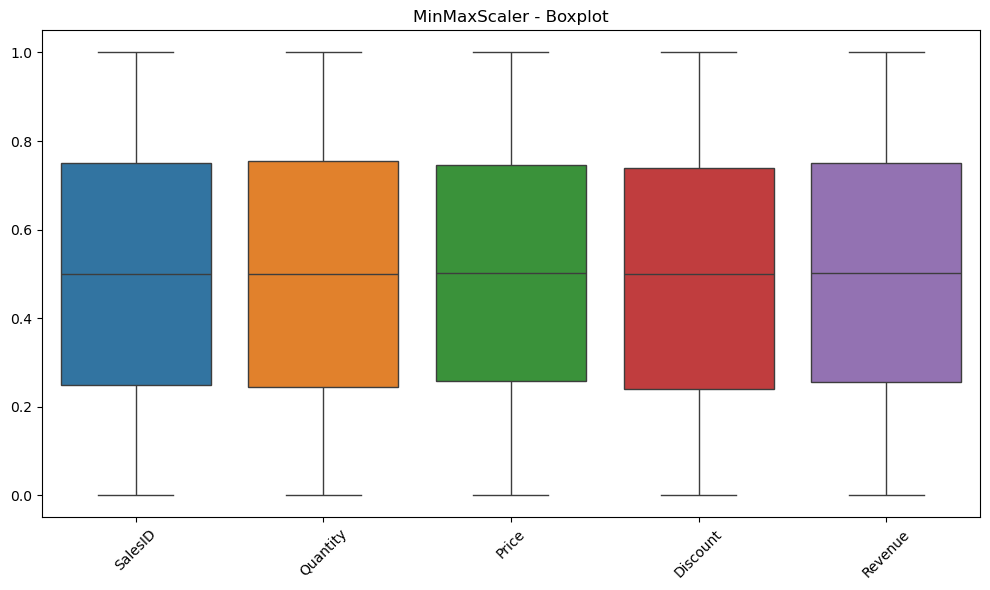


StandardScaler (Z-Score) (first 5 rows):
    SalesID  Quantity     Price  Discount   Revenue
0 -1.731878  0.074240  0.699331  1.245462  1.618937
1 -1.731531  1.507303  1.220587  1.314533 -1.264164
2 -1.731185 -1.219012 -0.504988  0.278467  0.884168
3 -1.730838  0.773295 -0.836709  0.071254 -0.590031
4 -1.730492  0.388814  1.550246  1.107320 -0.728936


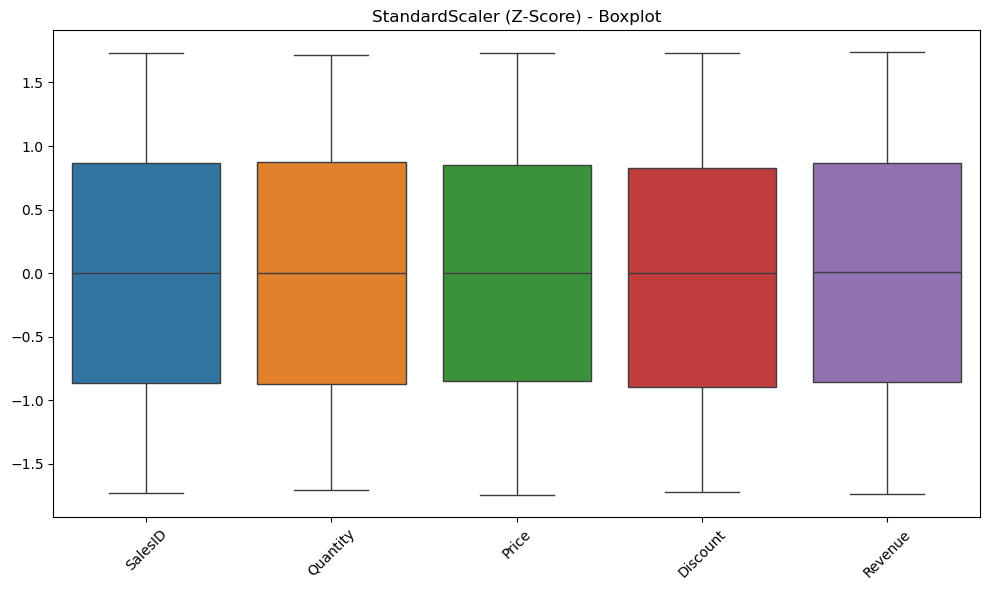


RobustScaler (first 5 rows):
   SalesID  Quantity     Price  Discount   Revenue
0  -1.0000      0.04  0.409765      0.72  0.936350
1  -0.9998      0.86  0.716274      0.76 -0.741043
2  -0.9996     -0.70 -0.298399      0.16  0.508860
3  -0.9994      0.44 -0.493458      0.04 -0.348832
4  -0.9992      0.22  0.910121      0.64 -0.429647


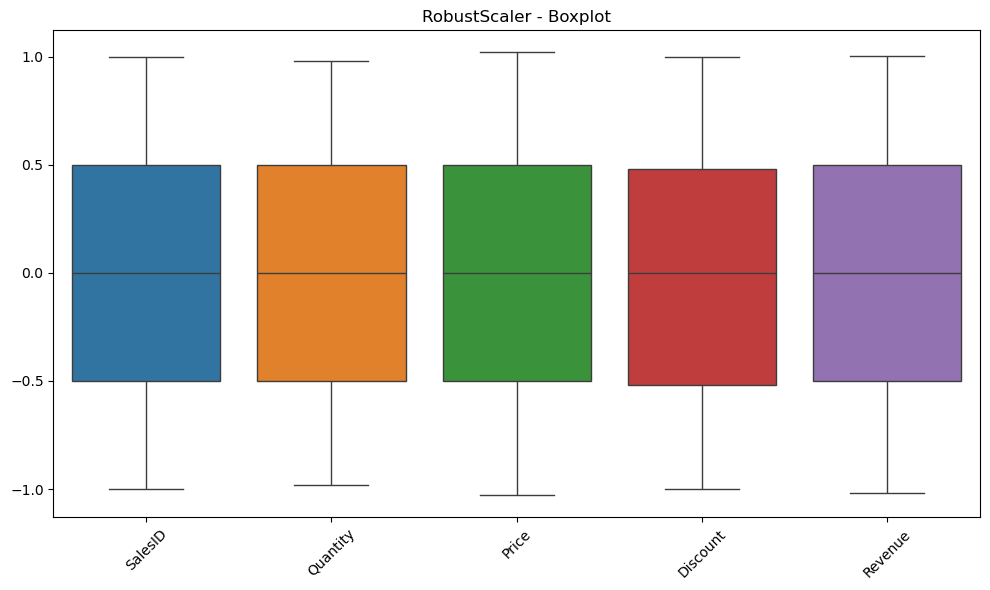


MaxAbsScaler (first 5 rows):
   SalesID  Quantity     Price  Discount   Revenue
0   0.0001  0.525253  0.708351      0.86  0.966571
1   0.0002  0.939394  0.855006      0.88  0.144930
2   0.0003  0.151515  0.369517      0.58  0.757173
3   0.0004  0.727273  0.276188      0.52  0.337048
4   0.0005  0.616162  0.947755      0.82  0.297462


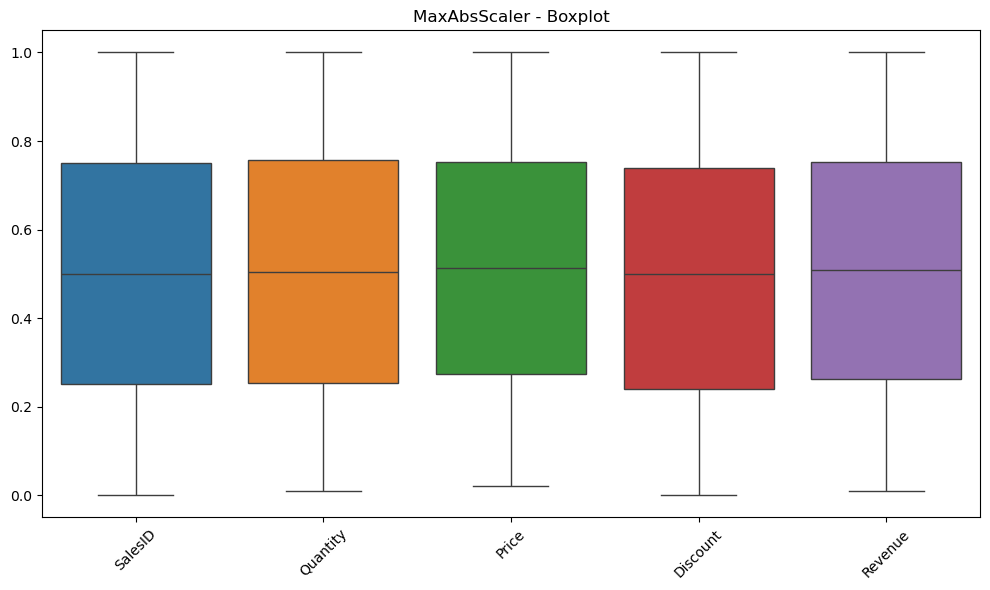

In [5]:
# Apply scalers and store scaled data
scaled_data = {}
for name, scaler in scalers.items():
    scaled = scaler.fit_transform(df[numeric_cols])
    scaled_df = pd.DataFrame(scaled, columns=numeric_cols)
    scaled_data[name] = scaled_df
    
    print(f"\n{name} (first 5 rows):")
    print(scaled_df.head())

    # Boxplot
    plt.figure(figsize=(10,6))
    sns.boxplot(data=scaled_df)
    plt.title(f"{name} - Boxplot")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

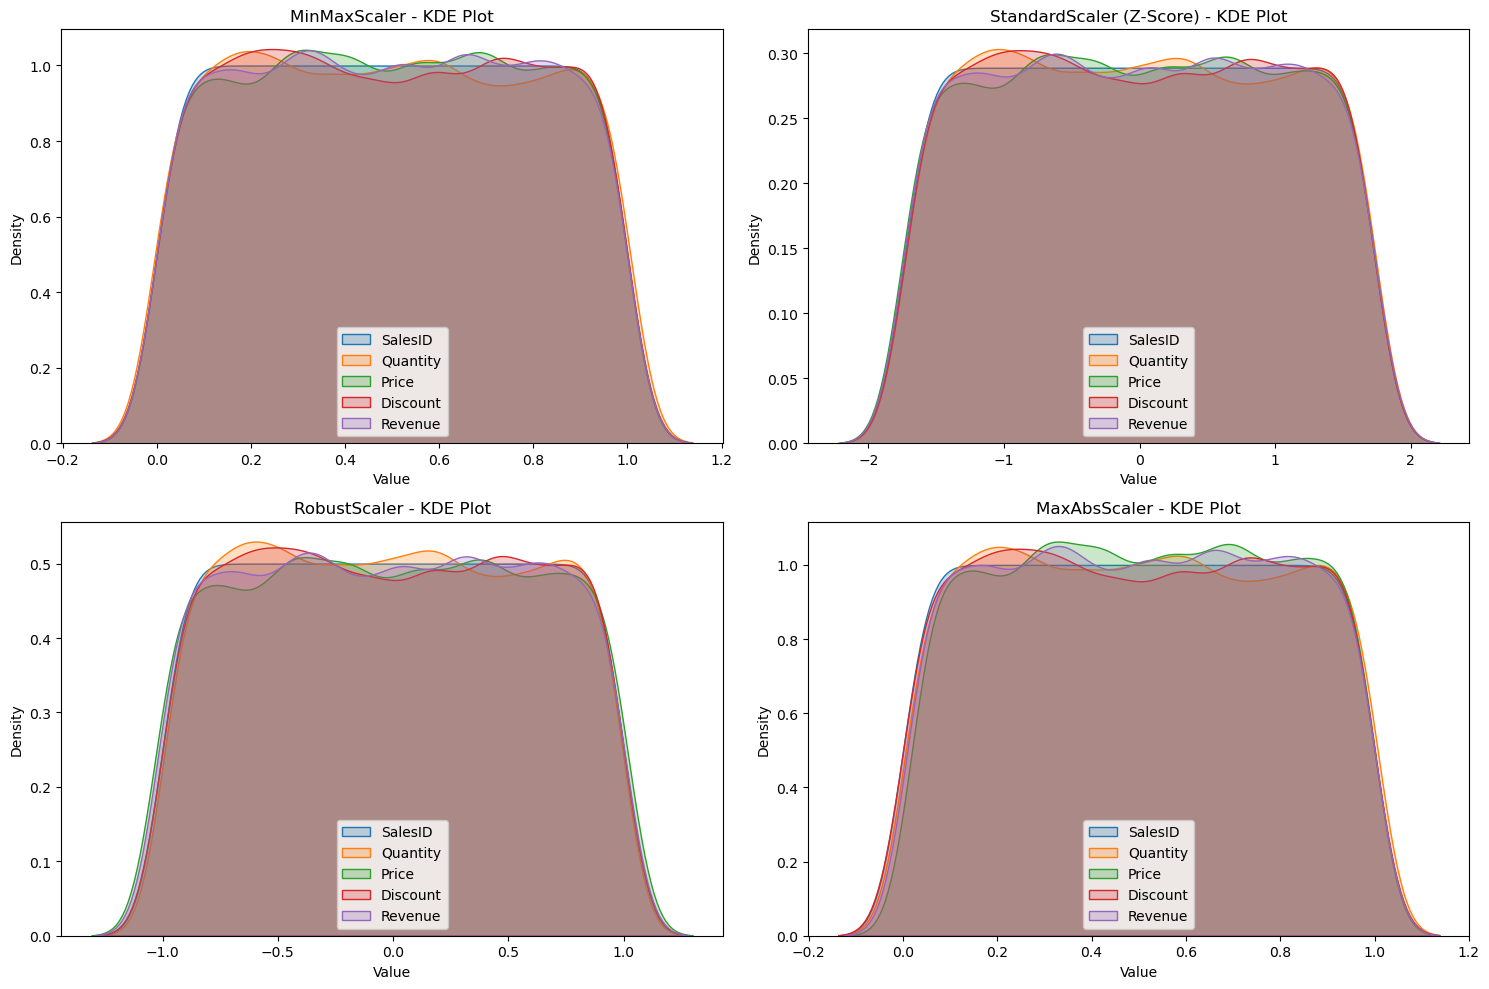

In [6]:
# Combined KDE plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, (name, scaled_df) in enumerate(scaled_data.items()):
    for col in numeric_cols:
        sns.kdeplot(scaled_df[col], label=col, ax=axes[i], fill=True)
    axes[i].set_title(f"{name} - KDE Plot")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Density")
    axes[i].legend()

plt.tight_layout()
plt.show()

### Z-Score Normalization with Mean Centering

In [7]:
zscore_scaler = StandardScaler(with_mean=True, with_std=True)
zscore_data = zscore_scaler.fit_transform(df[numeric_cols])
zscore_df = pd.DataFrame(zscore_data, columns=numeric_cols)

In [8]:
print("\nZ-Score Normalization with Mean Centering (first 5 rows):")
zscore_df.head()


Z-Score Normalization with Mean Centering (first 5 rows):


,SalesID,Quantity,Price,Discount,Revenue
0,-1.731878,0.074240,0.699331,1.245462,1.618937
1,-1.731531,1.507303,1.220587,1.314533,-1.264164
2,-1.731185,-1.219012,-0.504988,0.278467,0.884168
3,-1.730838,0.773295,-0.836709,0.071254,-0.590031
4,-1.730492,0.388814,1.550246,1.107320,-0.728936


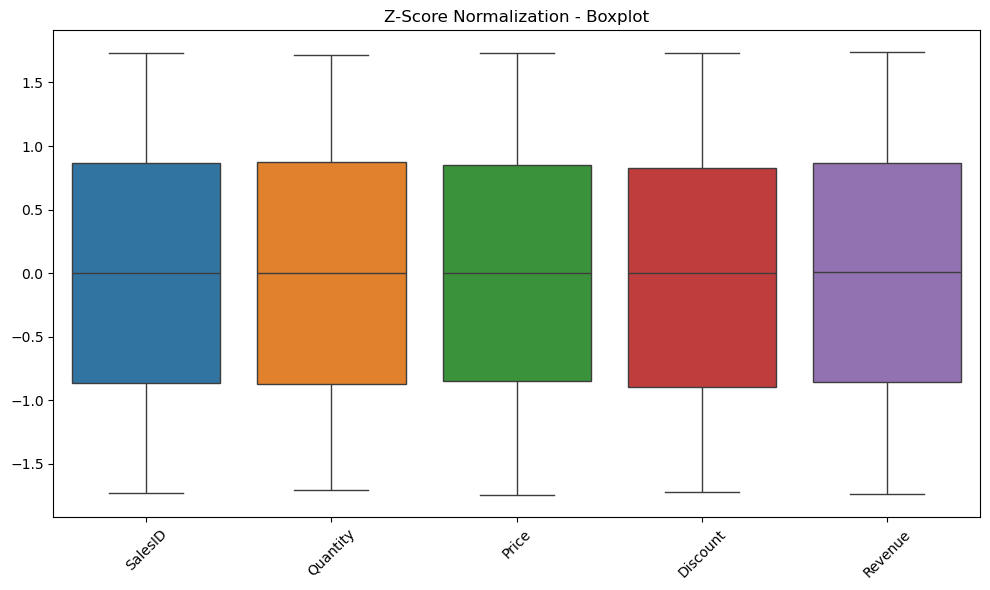

In [9]:
# Boxplot for Z-Score normalized data
plt.figure(figsize=(10,6))
sns.boxplot(data=zscore_df)
plt.title("Z-Score Normalization - Boxplot")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

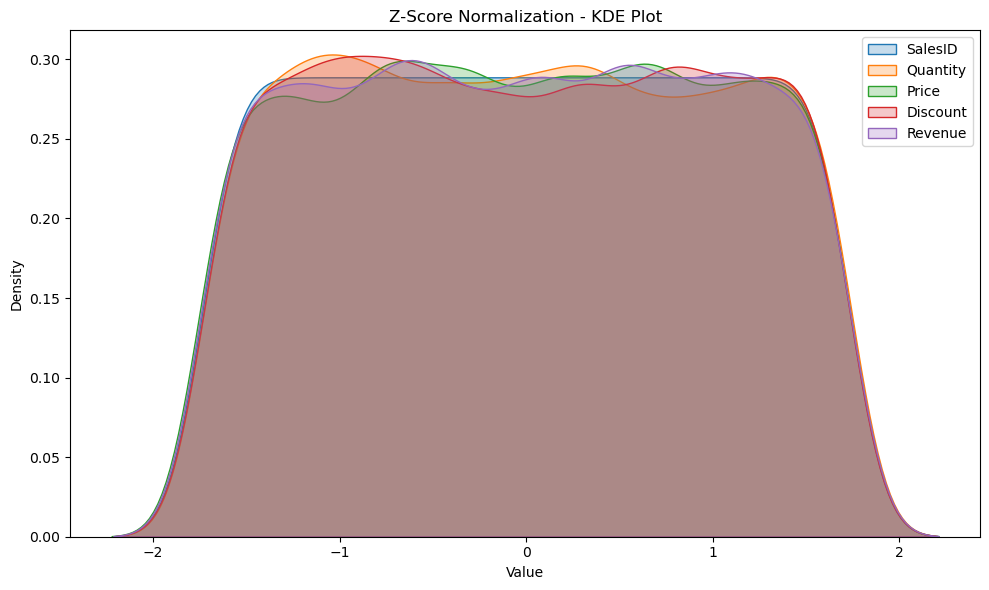

In [10]:
# KDE Plot for Z-Score normalized data
plt.figure(figsize=(10,6))
for col in numeric_cols:
    sns.kdeplot(zscore_df[col], label=col, fill=True)
plt.title("Z-Score Normalization - KDE Plot")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()